In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Reading dataset

df=pd.read_csv('/content/HousePrices.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [ ]:
df.head(5)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Checking null values
df.isnull().sum()*100/df.shape[0]

Id                      0.000000
Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            15.436565
LotArea                 0.000000
                         ...    
MoSold                  0.000000
YrSold                  0.000000
SaleType                0.000000
SaleCondition           0.000000
Property_Sale_Price     0.000000
Length: 81, dtype: float64

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64
------------------------------
TOTAL MISSING VALUES: 9871


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.0,916.132176,493.014670,1.0,519.0,932.0,1302.0,1820.0
Dwell_Type,2073.0,60.556199,159.924810,20.0,20.0,50.0,70.0,7080.0
LotFrontage,1753.0,72.056475,27.987475,21.0,60.0,70.0,83.0,313.0
LotArea,2073.0,10717.853353,9215.982306,1300.0,7620.0,9492.0,11601.0,215245.0
OverallQual,2073.0,6.233478,1.517115,1.0,5.0,6.0,7.0,10.0
OverallCond,2073.0,5.835022,1.360214,1.0,5.0,5.0,7.0,9.0
YearBuilt,2073.0,1969.445731,30.222647,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,2073.0,1986.617463,20.432694,1950.0,1970.0,1995.0,2004.0,2023.0
MasVnrArea,2059.0,101.875668,179.169217,0.0,0.0,0.0,161.5,1600.0
BsmtFinSF1,2073.0,437.949349,448.051119,0.0,0.0,381.0,708.0,5644.0


**Visualizing the correlations between numerical variables**

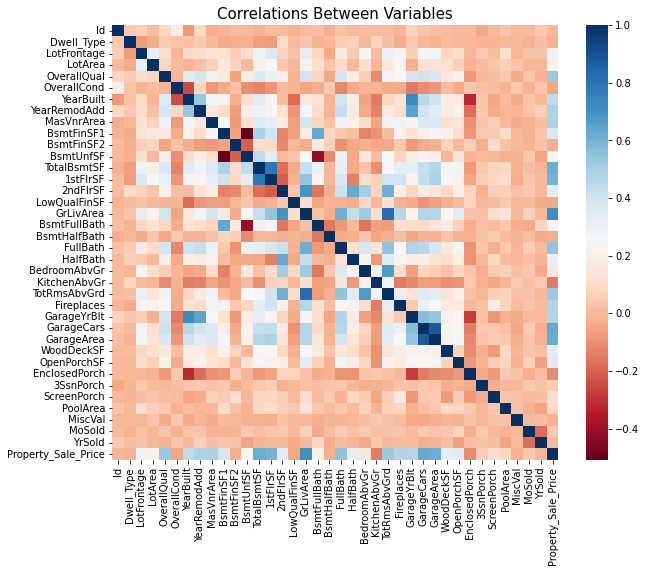

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Feature Selection

In [ ]:
important_num_cols = list(df.corr()["Property_Sale_Price"][(df.corr()["Property_Sale_Price"]>0.50) | (df.corr()["Property_Sale_Price"]<-0.50)].index)
cat_cols = ["Zone_Class", "Utilities","Dwell_Type","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

Data Visualization

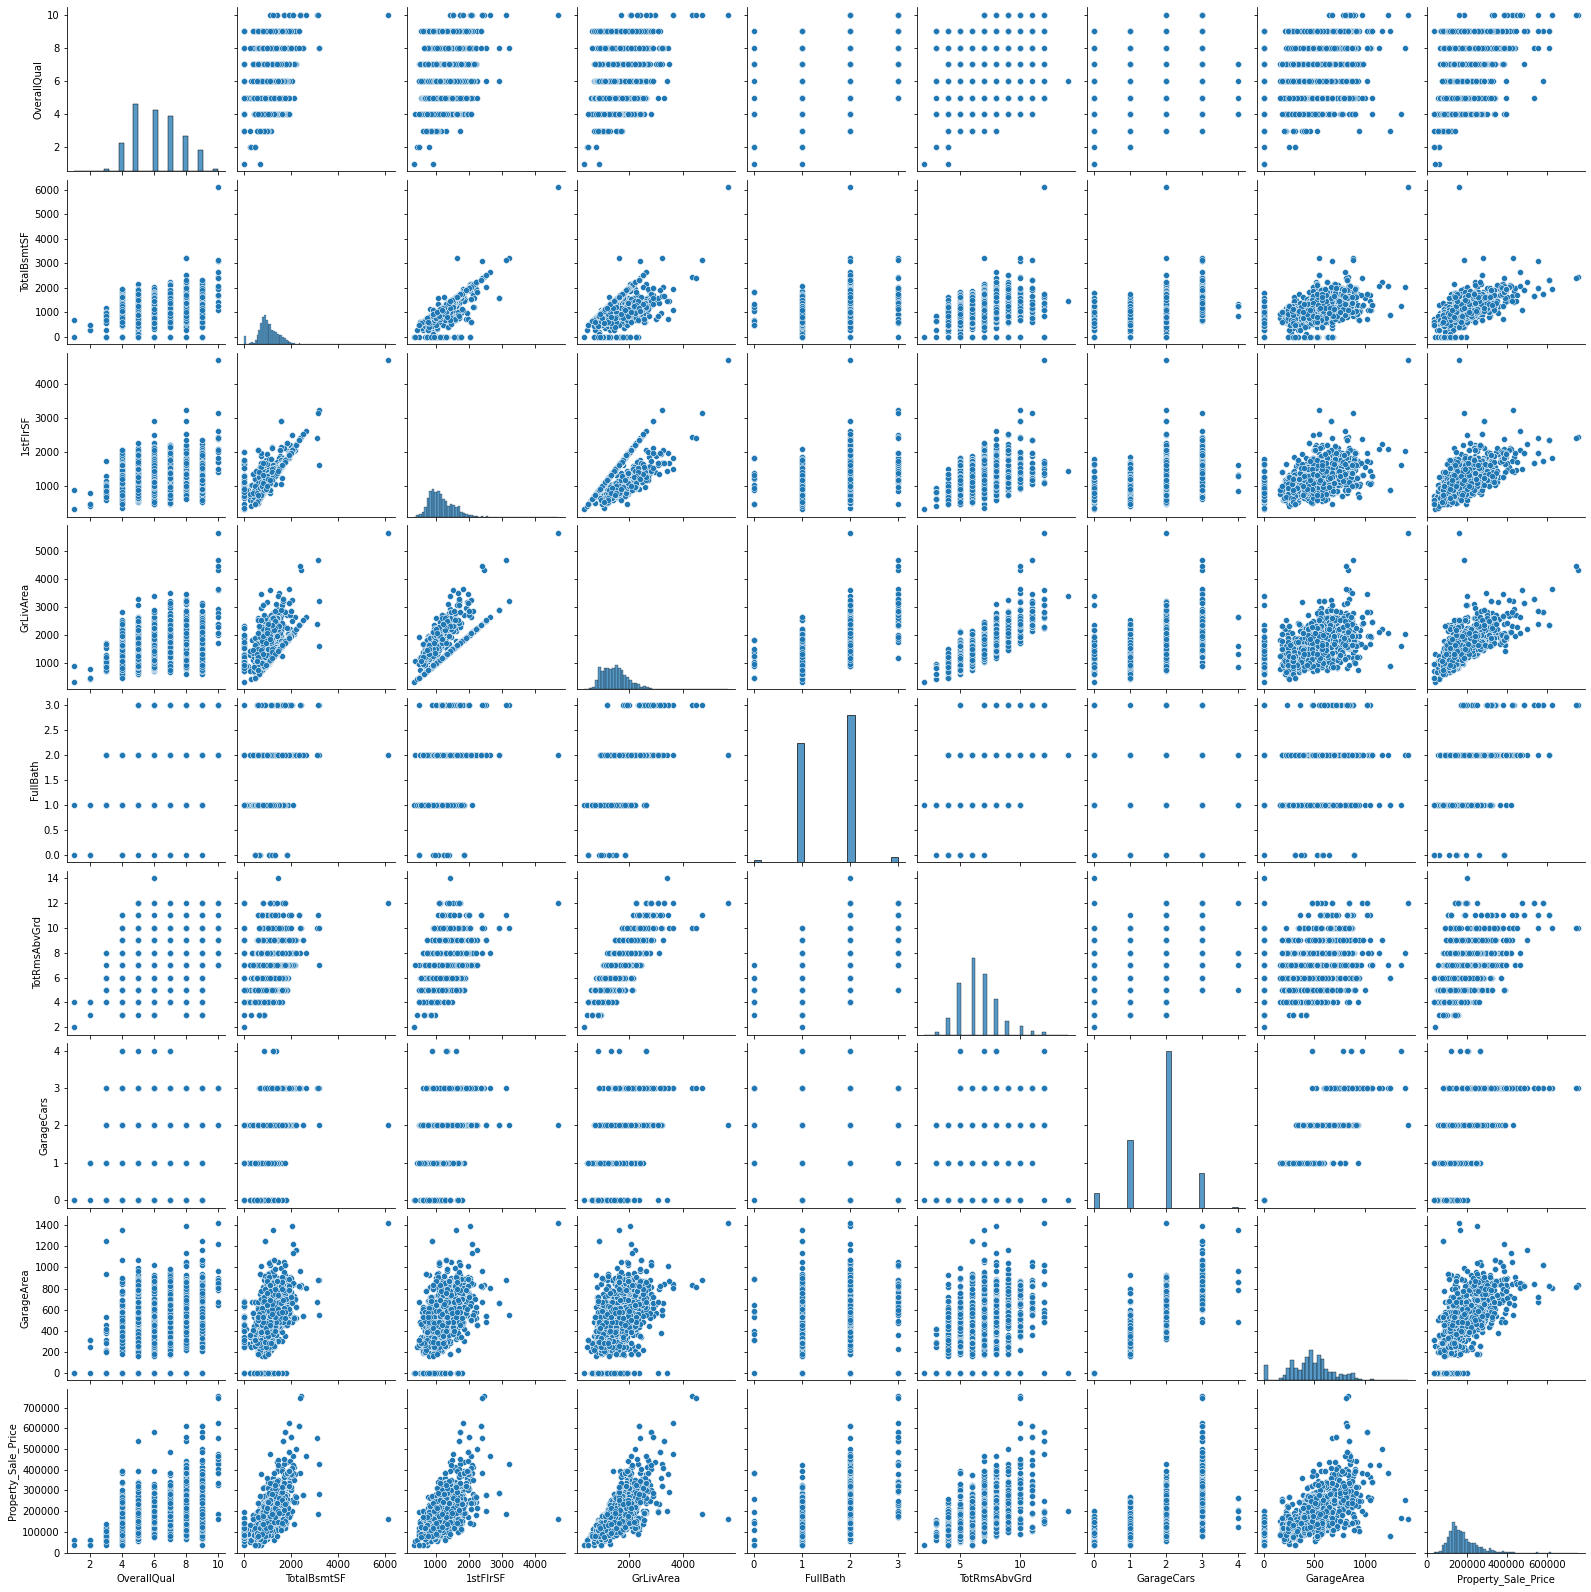

In [ ]:
sns.pairplot(df[important_num_cols])

X, y Split

In [ ]:
X = df.drop("Property_Sale_Price", axis=1)
y = df["Property_Sale_Price"]

In [ ]:
X = pd.get_dummies(X, columns=cat_cols)

Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
important_num_cols.remove("Property_Sale_Price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
X.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Zone_Class_C (all),Zone_Class_FV,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.505371,-0.455465,-0.822791,0.373205,0.784793,0.895930,0.302391,0.345454,0,0,...,0,0,0,0,0,1,0,1,0,0
1,-0.153933,0.486700,0.254463,-0.493145,0.784793,-0.331607,0.302391,-0.069183,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0.505371,-0.306946,-0.652978,0.520176,0.784793,-0.331607,0.302391,0.628161,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0.505371,-0.687525,-0.544191,0.386742,-1.047275,0.282162,1.650469,0.788362,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1.164676,0.215189,-0.055977,1.316909,0.784793,1.509698,1.650469,1.702448,0,0,...,0,0,0,0,0,1,0,1,0,0


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

Machine Learning Models

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6718049793559.496
MSE: 1.8729859982576765e+28
RMSE: 136857078671790.9
R2 Score: -3.204557988212483e+18
------------------------------
RMSE Cross-Validation: 525793021898.4883
